In [1]:
import main_functions

In [21]:
import pandas as pd
import numpy as np

from copy import deepcopy

import lightgbm as lgb
from sklearn.model_selection import train_test_split
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import helpers

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
BUREAU = pd.read_csv('data/bureau.csv')
application_df = pd.read_csv('data/application_train.csv')
application_test_df = pd.read_csv('data/application_test.csv')
t = main_functions.build_training_data_for_application(application_df)
application_transformed_df, pd = t
t = main_functions.build_training_data_for_application(application_test_df, pd)
application_transformed_test_df, _ = t
application_transformed_df['SK_ID_CURR'] = application_df['SK_ID_CURR']
application_transformed_test_df['SK_ID_CURR'] = application_test_df['SK_ID_CURR']
application_transformed_df, BUREAU_FEATURES = main_functions.add_bureau_features(
    application_transformed_df, BUREAU)
application_transformed_test_df, BUREAU_FEATURES = main_functions.add_bureau_features(
    application_transformed_test_df, BUREAU)

In [28]:
print(application_test_df.shape)
print(application_transformed_test_df.shape)

(48744, 121)
(48744, 141)


In [29]:
application_transformed_df.sample(5)

,application__OCCUPATION_TYPE__Accountants,application__OCCUPATION_TYPE__Cooking staff,application__OCCUPATION_TYPE__Core staff,application__OCCUPATION_TYPE__Drivers,application__OCCUPATION_TYPE__High skill tech staff,application__OCCUPATION_TYPE__Laborers,application__OCCUPATION_TYPE__Low-skill Laborers,application__OCCUPATION_TYPE__Managers,application__OCCUPATION_TYPE__Medicine staff,application__OCCUPATION_TYPE__Sales staff,application__OCCUPATION_TYPE__Security staff,application__OCCUPATION_TYPE__nan,application__OWN_CAR_AGE__0_8,application__OWN_CAR_AGE__12_60,application__OWN_CAR_AGE__nan,application__CODE_GENDER__male,application__CODE_GENDER__female,application__NAME_FAMILY_STATUS__Civil marriage,application__NAME_FAMILY_STATUS__Married,application__NAME_FAMILY_STATUS__Single / not married,application__NAME_FAMILY_STATUS__Widow,application__FLAG_EMP_PHONE,application__FLAG_WORK_PHONE,application__FLAG_PHONE,application__CNT_CHILDREN__0,application__CNT_CHILDREN__1,application__CNT_CHILDREN__2_inf,application__CNT_FAM_MEMBERS__2,application__CNT_FAM_MEMBERS__3,application__CNT_FAM_MEMBERS__4_inf,application__NAME_INCOME_TYPE__Commercial associate,application__NAME_INCOME_TYPE__Pensioner,application__NAME_INCOME_TYPE__State servant,application__NAME_INCOME_TYPE__Working,application__NAME_EDUCATION_TYPE__Higher education,application__NAME_EDUCATION_TYPE__Lower secondary,application__NAME_EDUCATION_TYPE__Secondary / secondary special,application__NAME_HOUSING_TYPE__House / apartment,application__NAME_HOUSING_TYPE__Rented apartment,application__NAME_HOUSING_TYPE__With parents,application__ORGANIZATION_TYPE__high_default_rate,application__ORGANIZATION_TYPE__low_default_rate,application__DAYS_BIRTH,application__AMT_INCOME_TOTAL,application__AMT_CREDIT,application__AMT_ANNUITY,application__AMT_GOODS_PRICE,application__AMT_REQ_CREDIT_BUREAU_YEAR__6_inf,application__NONLIVINGAPARTMENTS_AVG,application__BASEMENTAREA_MEDI,application__YEARS_BEGINEXPLUATATION_MEDI,application__YEARS_BUILD_MEDI,application__COMMONAREA_MEDI,application__ENTRANCES_MEDI,application__FLOORSMAX_MEDI,application__LANDAREA_MEDI,application__NONLIVINGAREA_MEDI,application__TOTALAREA_MODE,application__FLAG_DOCUMENT_3,application__EXT_SOURCE_1,application__EXT_SOURCE_2,application__EXT_SOURCE_3,application__REGION_RATING_CLIENT,application__REGION_RATING_CLIENT_W_CITY,application__REG_CITY_NOT_LIVE_CITY,application__REG_CITY_NOT_WORK_CITY,application__LIVE_CITY_NOT_WORK_CITY,application__REGION_POPULATION_RELATIVE,application__NAME_CONTRACT_TYPE__cash,SK_ID_CURR,bureau___previous_credits_count,bureau___previous_credits_active_count,bureau___previous_credits_closed_count,bureau___previous_credits_active_rate,bureau___SK_ID_BUREAU_median,bureau___SK_ID_BUREAU_mean,bureau___SK_ID_BUREAU_max,bureau___SK_ID_BUREAU_min,bureau___SK_ID_BUREAU_sum,bureau___DAYS_CREDIT_median,bureau___DAYS_CREDIT_mean,bureau___DAYS_CREDIT_max,bureau___DAYS_CREDIT_min,bureau___DAYS_CREDIT_sum,bureau___CREDIT_DAY_OVERDUE_median,bureau___CREDIT_DAY_OVERDUE_mean,bureau___CREDIT_DAY_OVERDUE_max,bureau___CREDIT_DAY_OVERDUE_min,bureau___CREDIT_DAY_OVERDUE_sum,bureau___DAYS_CREDIT_ENDDATE_median,bureau___DAYS_CREDIT_ENDDATE_mean,bureau___DAYS_CREDIT_ENDDATE_max,bureau___DAYS_CREDIT_ENDDATE_min,bureau___DAYS_CREDIT_ENDDATE_sum,bureau___DAYS_ENDDATE_FACT_median,bureau___DAYS_ENDDATE_FACT_mean,bureau___DAYS_ENDDATE_FACT_max,bureau___DAYS_ENDDATE_FACT_min,bureau___DAYS_ENDDATE_FACT_sum,bureau___AMT_CREDIT_MAX_OVERDUE_median,bureau___AMT_CREDIT_MAX_OVERDUE_mean,bureau___AMT_CREDIT_MAX_OVERDUE_max,bureau___AMT_CREDIT_MAX_OVERDUE_min,bureau___AMT_CREDIT_MAX_OVERDUE_sum,bureau___CNT_CREDIT_PROLONG_median,bureau___CNT_CREDIT_PROLONG_mean,bureau___CNT_CREDIT_PROLONG_max,bureau___CNT_CREDIT_PROLONG_min,bureau___CNT_CREDIT_PROLONG_sum,bureau___AMT_CREDIT_SUM_median,bureau___AMT_CREDIT_SUM_mean,bureau___AMT_CREDIT_SUM_max,bureau___AMT_CREDIT_SUM_min,bureau___AMT_CREDIT_SUM_sum,bureau___AMT_CREDIT_SUM_DEBT

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.808537	train's binary_logloss: 0.539458	valid's auc: 0.760042	valid's binary_logloss: 0.557781
Early stopping, best iteration is:
[275]	train's auc: 0.823742	train's binary_logloss: 0.524351	valid's auc: 0.760553	valid's binary_logloss: 0.548228


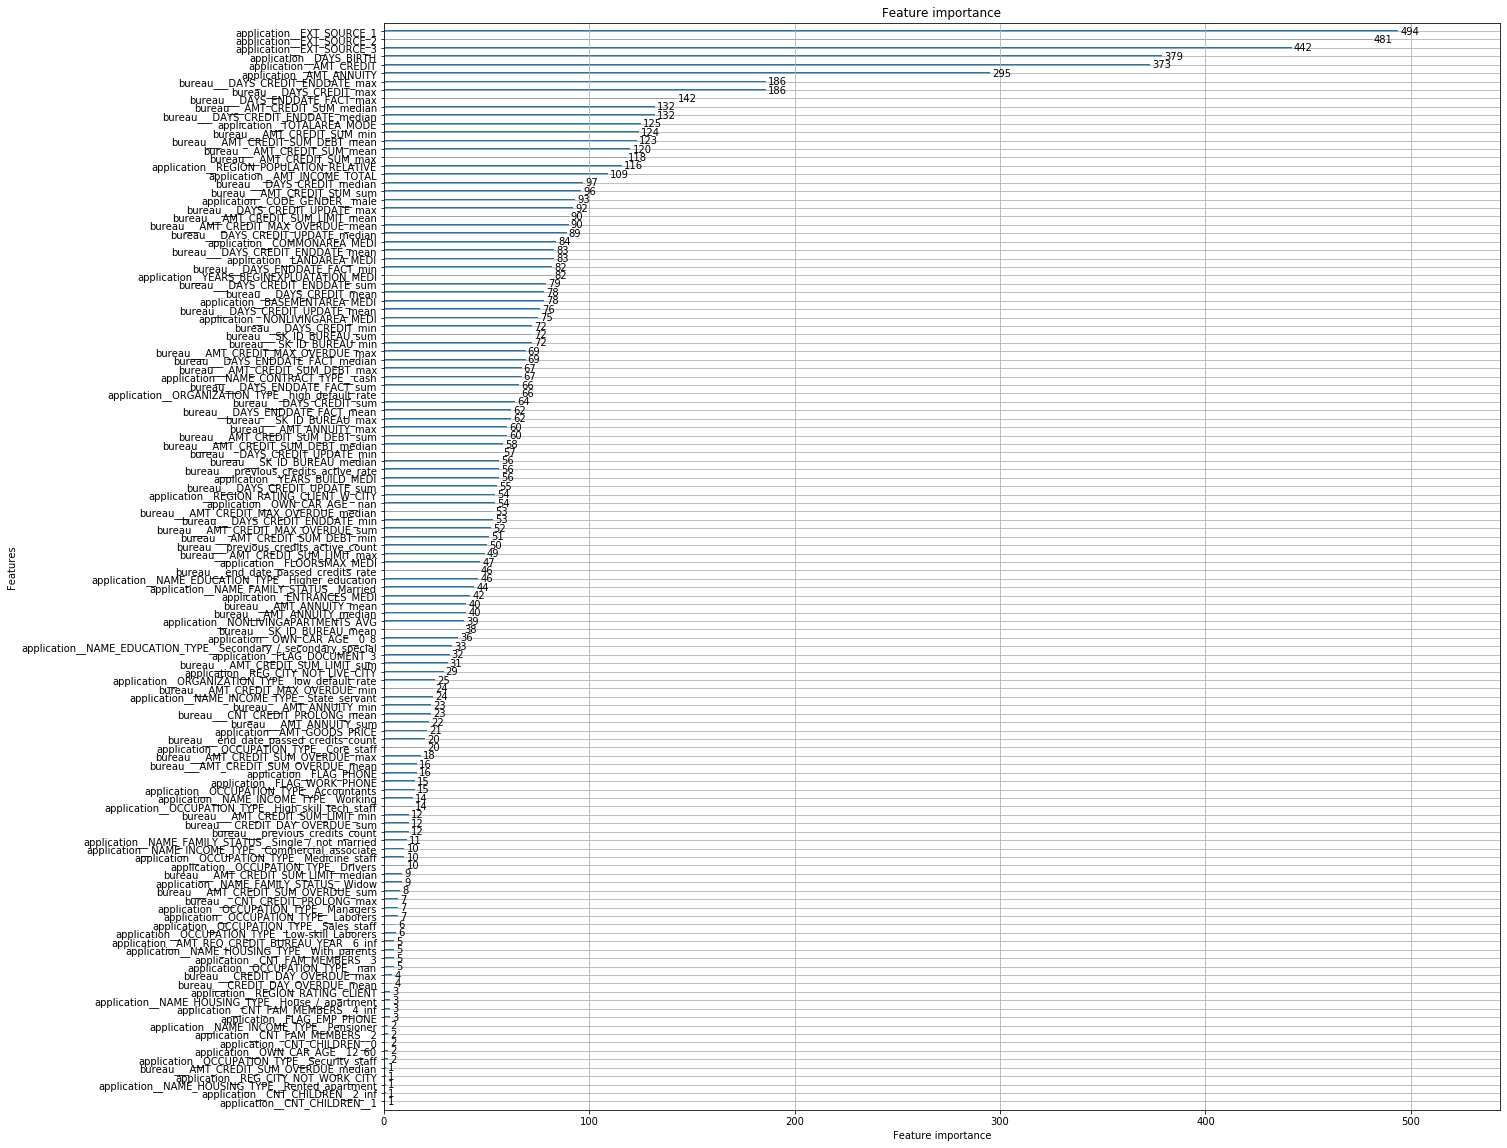

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    application_transformed_df.drop(['SK_ID_CURR'], axis=1), 
    application_df['TARGET'], test_size=0.33, random_state=42)
model = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary',
                           class_weight = 'balanced', learning_rate = 0.05, 
                           reg_alpha = 0.1, reg_lambda = 0.1, 
                           subsample = 0.8, n_jobs = -1, random_state = 57)
model.fit(
    X_train, y_train, eval_metric = 'auc', 
    eval_set = [(X_test, y_test), (X_train, y_train)],
    eval_names = ['valid', 'train'],early_stopping_rounds = 100, verbose = 200)
lgb.plot_importance(model, figsize=(20,20))

In [31]:
ans = model.predict(application_transformed_test_df.drop(['SK_ID_CURR'], axis=1))
helpers.create_submission(ans).to_csv('application-bureau.csv', index=False)

In [32]:
set(application_transformed_df.columns) - set(application_transformed_test_df.columns)

set()